In [165]:
# from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahdiraghib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df_successful = pd.read_csv('Hot100.csv')
df_successful['year'] = df_successful['WeekID'].str[:4]
month = df_successful['WeekID'].str[5:7]
df_successful['month'] = month
# df_unsuccessful = pd.read_csv('UnsuccessfulSong.csv')

df_successful.head()

,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment,year,month
0,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,1,"For your love, oh, I would do anything\nI woul...",0.500000,1958,08
1,1958-08-02,1176,http://www.billboard.com/charts/hot-100/1958-0...,20,Do You Want To Dance,Bobby Freeman,Do You Want To DanceBobby Freeman,1,NaN,20,1,Do you want to dance and hold my hand?\nTell m...,0.000000,1958,08
2,1958-08-02,7536,http://www.billboard.com/charts/hot-100/1958-0...,52,Early In The Morning,The Rinky-Dinks,Early In The MorningThe Rinky-Dinks,1,NaN,52,1,Well...\n\nYou're gonna miss me\nEarly in the ...,0.028175,1958,08
3,1958-08-02,7028,http://www.billboard.com/charts/hot-100/1958-0...,17,Endless Sleep,Jody Reynolds,Endless SleepJody Reynolds,1,NaN,17,1,"VERSE 1\nThe night was black, rain falling dow...",-0.089815,1958,08
4,1958-08-02,27738,http://www.billboard.com/charts/hot-100/1958-0...,57,You Need Hands,Eydie Gorme,You Need HandsEydie Gorme,1,NaN,57,1,You need hands\nTo hold someone you care for\n...,0.278788,1958,08


In [168]:
df_features = pd.read_excel('Hot100AudioFeatures.xlsx') 
df_features.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,0.0,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,0.0,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,0.0,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [169]:
df = pd.merge(df_successful, df_features, on='Song', how='left')
df.head()

,WeekID,Unnamed: 0,url,Week Position,Song,Performer_x,SongID_x,Instance,Previous Week Position,Peak Position,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-10.097,1.0,0.0298,0.8380,0.000003,0.187,0.369,94.409,3.0,24.0
2,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-13.387,1.0,0.0366,0.3280,0.000002,0.376,0.561,178.607,3.0,16.0
3,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-8.955,1.0,0.0317,0.7660,0.000001,0.137,0.893,134.042,4.0,33.0
4,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-10.457,1.0,0.0367,0.0987,0.000000,0.316,0.315,133.838,4.0,49.0


In [170]:
# df.shape

df.columns

Index(['WeekID', 'Unnamed: 0', 'url', 'Week Position', 'Song', 'Performer_x',
       'SongID_x', 'Instance', 'Previous Week Position', 'Peak Position',
       'Weeks on Chart', 'Lyrics', 'Sentiment', 'year', 'month', 'SongID_y',
       'Performer_y', 'spotify_genre', 'spotify_track_id',
       'spotify_track_preview_url', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity'],
      dtype='object')

In [171]:
df_features.columns

Index(['SongID', 'Performer', 'Song', 'spotify_genre', 'spotify_track_id',
       'spotify_track_preview_url', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity'],
      dtype='object')

In [172]:
def preprocess(text):
    doc = nlp(text, disable=['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

In [173]:
"""Extract Keywords from text"""
def return_keywords(texts):
    xkeywords = []
    values = keywords(text=preprocess(texts),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords 
    except:
        return "no content"

In [174]:
df_successful = df_successful.drop_duplicates(subset=['Song'], keep='first')
df_successful = df_successful.reset_index(drop=True)

In [175]:
df_successful.shape

(21741, 15)

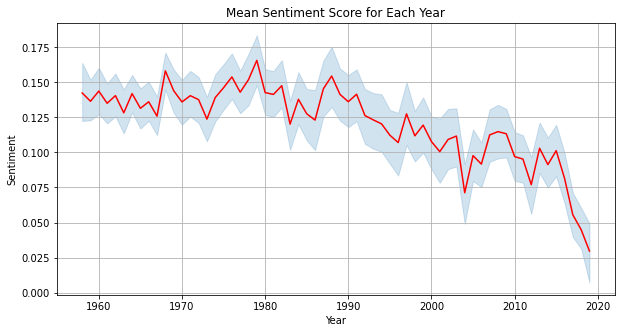

In [176]:
df_successful.groupby('year')['Sentiment'].mean()


# plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='Sentiment', data=df_successful)
plt.title('Mean Sentiment Score for Each Year')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.xlabel('Year')
plt.gca().lines[0].set_color('red')
plt.grid(True)

plt.show()



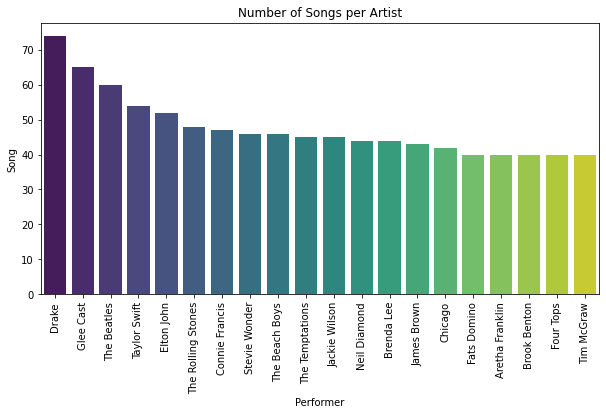

In [177]:
# df_successful.groupby('Performer')['Song'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,5), title='Number of Songs per Artist')

plt.figure(figsize=(10,5))
sns.barplot(x=df_successful.groupby('Performer')['Song'].count().sort_values(ascending=False).head(20).index, y=df_successful.groupby('Performer')['Song'].count().sort_values(ascending=False).head(20), palette='viridis')
plt.title('Number of Songs per Artist')
plt.xticks(rotation=90)
plt.show()

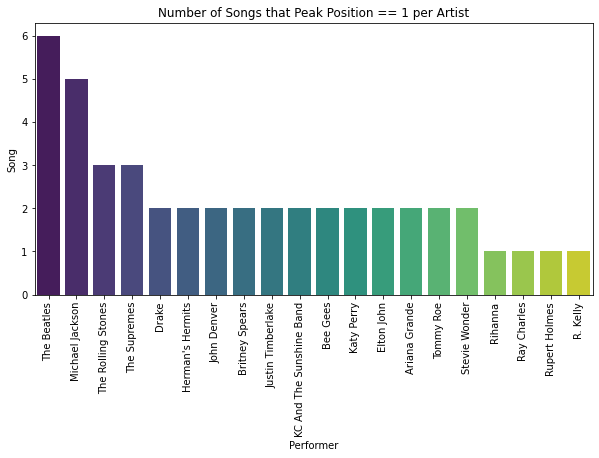

In [178]:
df_successful[df_successful['Peak Position'] == 1].groupby('Performer')['Song'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=df_successful[df_successful['Peak Position'] == 1].groupby('Performer')['Song'].count().sort_values(ascending=False).head(20).index, y=df_successful[df_successful['Peak Position'] == 1].groupby('Performer')['Song'].count().sort_values(ascending=False).head(20), palette='viridis')
plt.title('Number of Songs that Peak Position == 1 per Artist')
plt.xticks(rotation=90)
plt.show()



<AxesSubplot: title={'center': 'Number of Songs per Artist per Year'}, xlabel='year'>

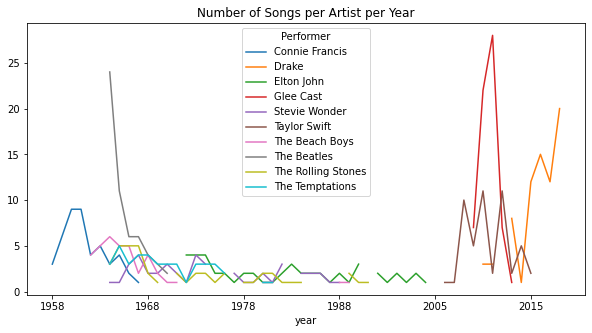

In [179]:
top10_artists = df_successful.groupby('Performer')['Song'].count().sort_values(ascending=False).head(10)

df_successful[df_successful['Performer'].isin(top10_artists.index)].groupby('Performer')['year'].agg(['min', 'max'])

df_successful[df_successful['Performer'].isin(top10_artists.index)].groupby(['year', 'Performer'])['Song'].count().unstack().plot(kind='line', figsize=(10,5), title='Number of Songs per Artist per Year')


In [180]:
df_successful[df_successful['Performer'].isin(top10_artists.index)].groupby('Performer')['year'].agg(['min', 'max'])

,min,max
Performer,,
Connie Francis,1958,1969
Drake,2010,2018
Elton John,1970,1998
Glee Cast,2009,2013
Stevie Wonder,1964,2005
Taylor Swift,2006,2017
The Beach Boys,1962,1989
The Beatles,1964,1995
The Rolling Stones,1964,1998


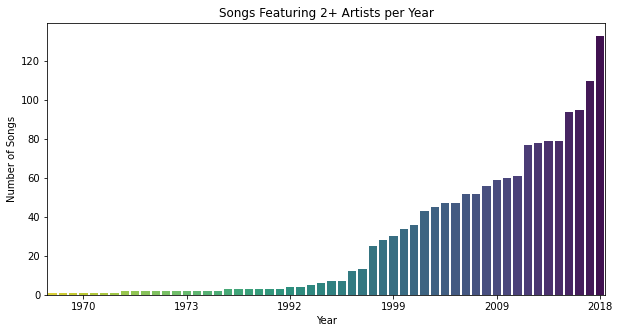

In [181]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_successful[df_successful['Performer'].str.contains('Featuring')]['year'].value_counts().index, y=df_successful[df_successful['Performer'].str.contains('Featuring')]['year'].value_counts(), palette='viridis')
plt.title('Songs Featuring 2+ Artists per Year')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.xlabel('Year')
plt.ylabel('Number of Songs')

plt.xticks(np.arange(0, len(df_successful[df_successful['Performer'].str.contains('Featuring')]['year'].value_counts()), 10))
plt.xticks(rotation=0)


plt.show()

Text(0.5, 1.0, 'Number of Weeks on Chart and Number of Songs')

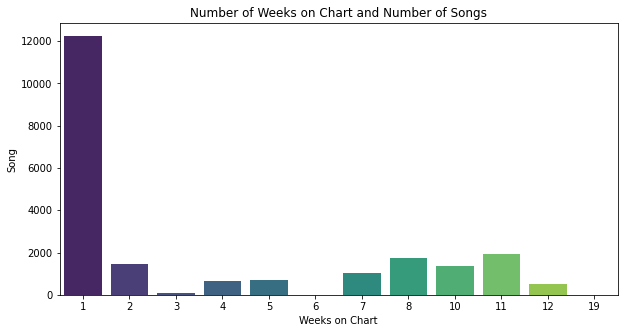

In [182]:
# df_successful.groupby('Weeks on Chart')['Song'].count().sort_values(ascending=False).head(50)

plt.figure(figsize=(10,5))
sns.barplot(x=df_successful.groupby('Weeks on Chart')['Song'].count().sort_values(ascending=False).head(30).index, y=df_successful.groupby('Weeks on Chart')['Song'].count().sort_values(ascending=False).head(30), palette='viridis')
plt.title('Number of Weeks on Chart and Number of Songs')

In [183]:
df_successful[df_successful['Weeks on Chart'] == 19][['Song', 'Performer']]
df_successful[df_successful['Weeks on Chart'] == 19][['Song', 'Performer']].values

array([["Even Though I'm Leaving", 'Luke Combs']], dtype=object)

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3678366133.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3678366133.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3678

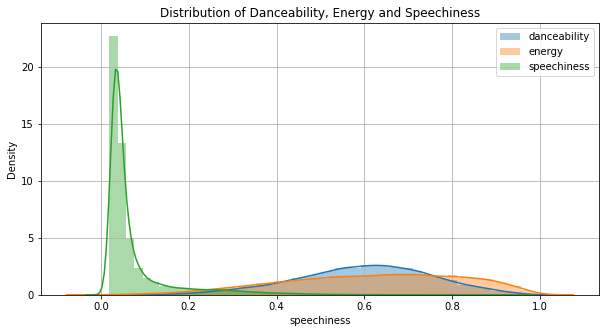

In [186]:
danceability = df_features['danceability']
energy = df_features['energy']
speechiness = df_features['speechiness']

plt.figure(figsize=(10,5))
sns.distplot(danceability, label='danceability')
sns.distplot(energy, label='energy')
sns.distplot(speechiness, label='speechiness')
plt.title('Distribution of Danceability, Energy and Speechiness')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3629103459.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3629103459.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3629

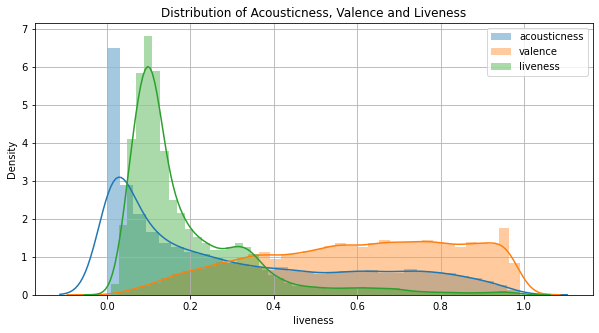

In [187]:
Acosuticness = df_features['acousticness']
Valence = df_features['valence']
Liviness = df_features['liveness']

plt.figure(figsize=(10,5))
sns.distplot(Acosuticness, label='acousticness')
sns.distplot(Valence, label='valence')
sns.distplot(Liviness, label='liveness')
plt.title('Distribution of Acousticness, Valence and Liveness')
plt.legend()

plt.grid(True)
plt.show()

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3891125274.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




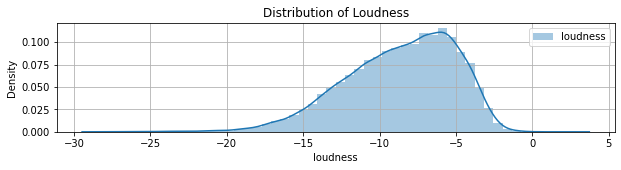

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3891125274.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




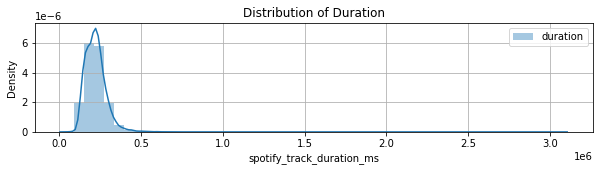

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3891125274.py:25: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




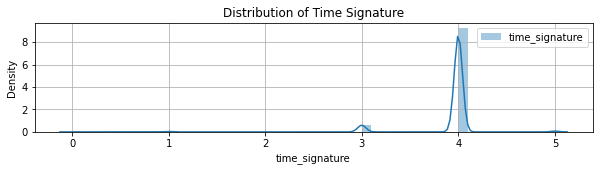

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/3891125274.py:34: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




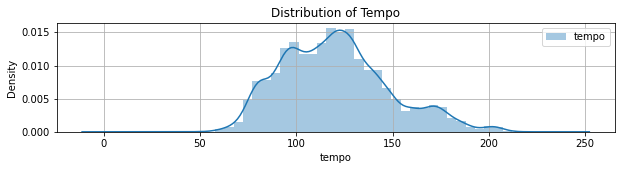

In [188]:
Loudness = df_features['loudness']
Duration = df_features['spotify_track_duration_ms']
Time_signature = df_features['time_signature']
Tempo = df_features['tempo']

plt.figure(figsize=(10,2))
sns.distplot(Loudness, label='loudness')
plt.title('Distribution of Loudness')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,2))
sns.distplot(Duration, label='duration')
plt.title('Distribution of Duration')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,2))
sns.distplot(Time_signature, label='time_signature')
plt.title('Distribution of Time Signature')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10,2))
sns.distplot(Tempo, label='tempo')
plt.title('Distribution of Tempo')
plt.legend()
# show grid
plt.grid()
plt.show()

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_1639/236519973.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




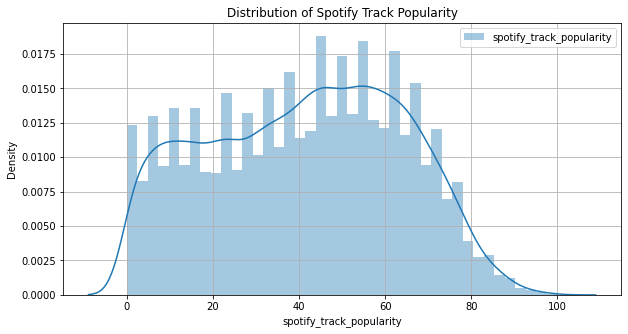

In [189]:
plt.figure(figsize=(10,5))
sns.distplot(df_features['spotify_track_popularity'], label='spotify_track_popularity')
plt.title('Distribution of Spotify Track Popularity')
plt.legend()
plt.grid()
plt.show()

In [190]:
df = pd.merge(df_successful, df_features, on='Song', how='left')
df.head()

,WeekID,Unnamed: 0,url,Week Position,Song,Performer_x,SongID_x,Instance,Previous Week Position,Peak Position,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-10.097,1.0,0.0298,0.8380,0.000003,0.187,0.369,94.409,3.0,24.0
2,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-13.387,1.0,0.0366,0.3280,0.000002,0.376,0.561,178.607,3.0,16.0
3,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-8.955,1.0,0.0317,0.7660,0.000001,0.137,0.893,134.042,4.0,33.0
4,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,...,-10.457,1.0,0.0367,0.0987,0.000000,0.316,0.315,133.838,4.0,49.0


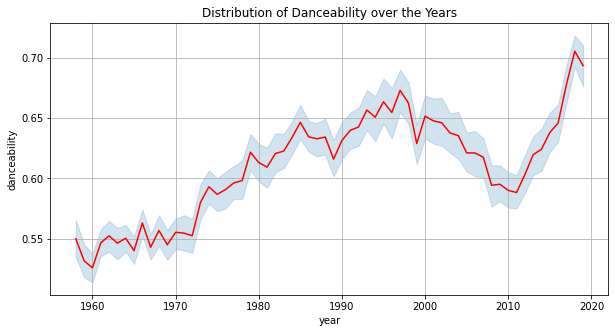

In [191]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='danceability', data=df)
plt.title('Distribution of Danceability over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()


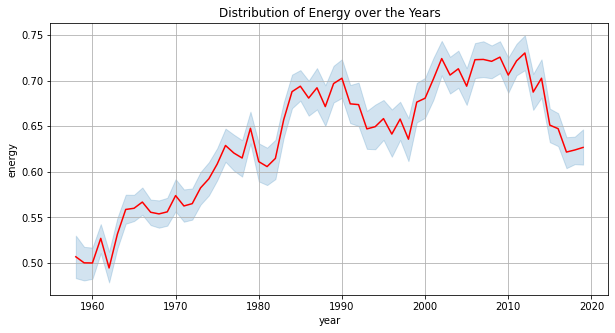

In [192]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='energy', data=df)
plt.title('Distribution of Energy over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()


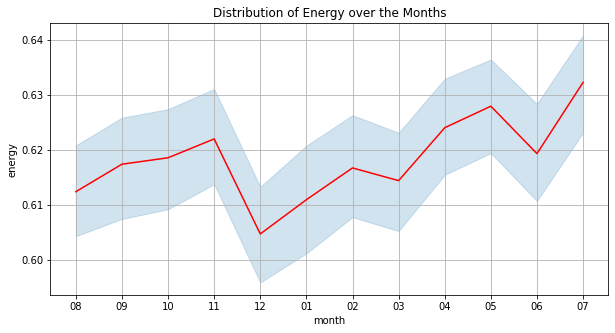

In [193]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='energy', data=df)
plt.title('Distribution of Energy over the Months')
xticks = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10','11','12']
plt.xticks(xticks)
plt.grid()

plt.gca().lines[0].set_color('red')

plt.show()

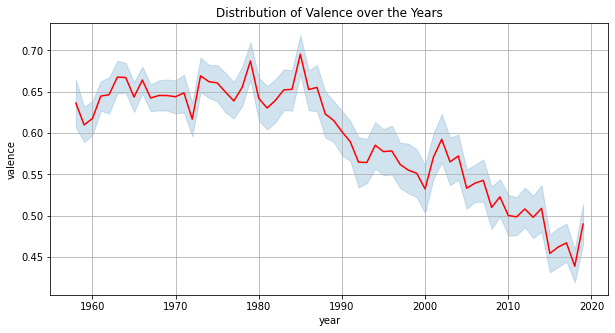

In [194]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='valence', data=df)
plt.title('Distribution of Valence over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()

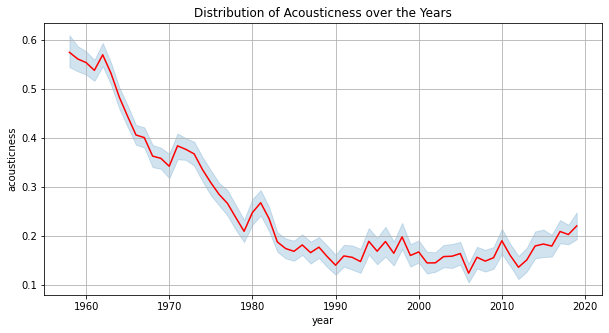

In [195]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='acousticness', data=df)
plt.title('Distribution of Acousticness over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()


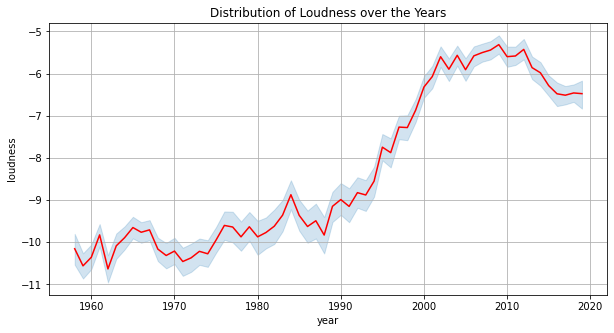

In [196]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='loudness', data=df)
plt.title('Distribution of Loudness over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()


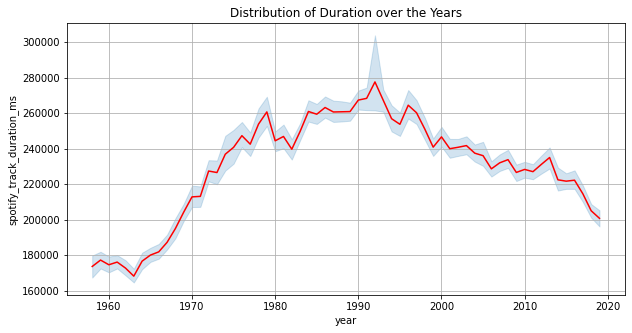

In [197]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='spotify_track_duration_ms', data=df)
plt.title('Distribution of Duration over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()

In [198]:
import plotly.express as px
dff = px.data.gapminder()
mean_weeks = df_successful.groupby('year')['Weeks on Chart'].mean()
mean_weeks = mean_weeks.reset_index()
mean_weeks.columns = ['year', 'mean_weeks']
fig = px.scatter(mean_weeks, x='year', y='mean_weeks', size='mean_weeks', color='mean_weeks', hover_name='year', size_max=60)
fig.update_traces(marker=dict(sizemode='area', sizeref=2.*max(mean_weeks['mean_weeks'])/(40.**2)))

fig.update_xaxes(tick0=1960, dtick=10)
fig.update_layout(title='Mean Weeks on Hot 100 per Year', xaxis_title='Year', yaxis_title='Mean Weeks on Hot 100')

fig.show()

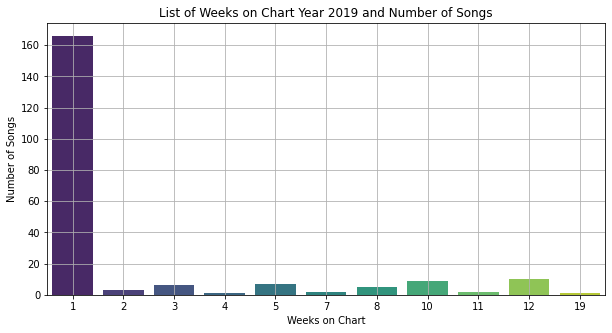

In [199]:
weeks_2019 = df_successful[df_successful['year'] == '2019']['Weeks on Chart'].unique()
weeks_2019

# df_successful[df_successful['year'] == '2019']['Weeks on Chart'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=weeks_2019, y=df_successful[df_successful['year'] == '2019']['Weeks on Chart'].value_counts().sort_index(), palette='viridis')
plt.title('List of Weeks on Chart Year 2019 and Number of Songs')
plt.xlabel('Weeks on Chart')
plt.ylabel('Number of Songs')
plt.grid()

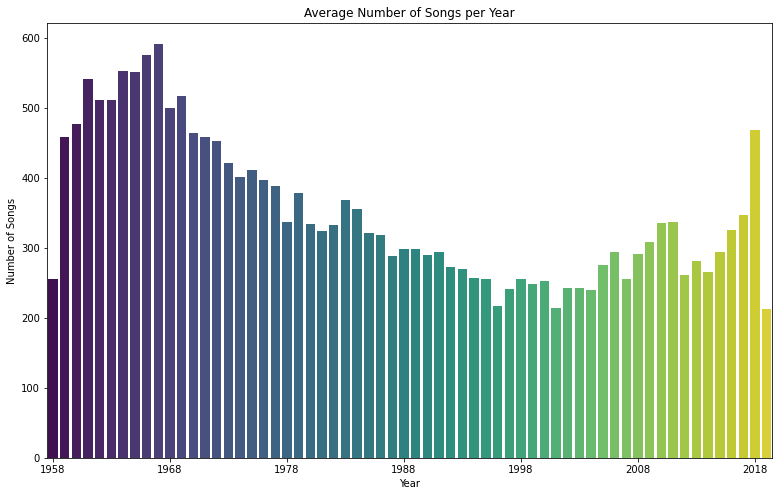

In [200]:
df_successful.groupby('year')['Song'].count().mean()

plt.figure(figsize=(13,8))
sns.barplot(x=df_successful.groupby('year')['Song'].count().index, y=df_successful.groupby('year')['Song'].count(), palette='viridis')
plt.title('Average Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(np.arange(0, len(df_successful.groupby('year')['Song'].count()), 10))
plt.show()

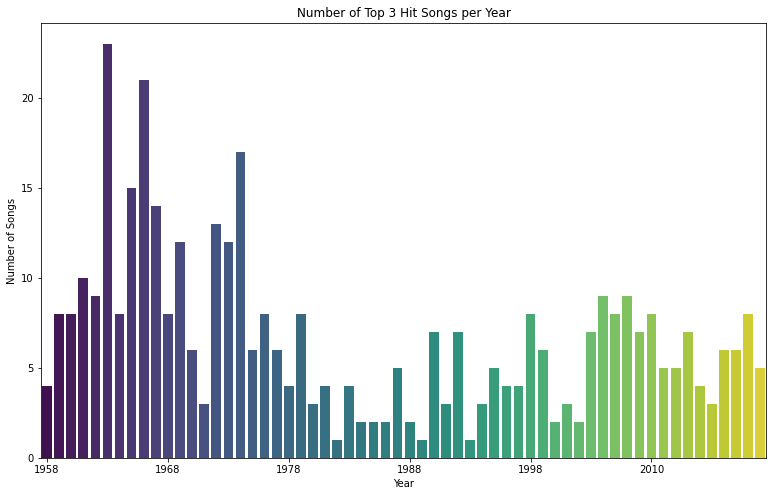

In [201]:
df_successful[df_successful['Peak Position'] <= 3].groupby('year')['Song'].count()
plt.figure(figsize=(13,8))
sns.barplot(x=df_successful[df_successful['Peak Position'] <= 3].groupby('year')['Song'].count().index, y=df_successful[df_successful['Peak Position'] <= 3].groupby('year')['Song'].count(), palette='viridis')
plt.title('Number of Top 3 Hit Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')

plt.xticks(np.arange(0, len(df_successful[df_successful['Peak Position'] <= 3].groupby('year')['Song'].count()), 10))
plt.show()

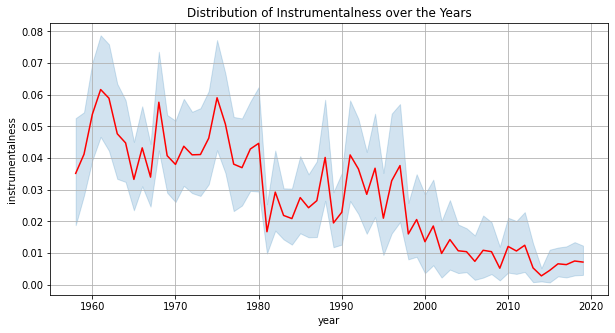

In [202]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='instrumentalness', data=df)
plt.title('Distribution of Instrumentalness over the Years')
xticks = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(xticks)
plt.grid()
plt.gca().lines[0].set_color('red')
plt.show()

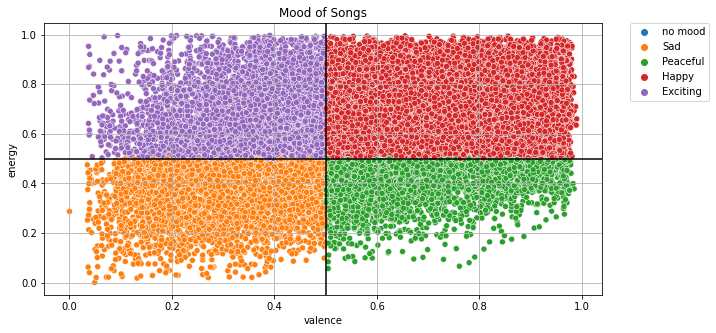

In [203]:
# “happy”: valence > 0.5, arousal (energy) > 0.5;
# “excited”: valence <= 0.5, arousal (energy) > 0.5;
# “sad”: valence <= 0.5, arousal (energy) <= 0.5;
# “peaceful”: valence > 0.5, arousal (energy) <= 0.5.

df['mood'] = np.where((df['valence'] > 0.5) & (df['energy'] > 0.5), 'Happy', np.where((df['valence'] <= 0.5) & (df['energy'] > 0.5), 'Exciting', np.where((df['valence'] <= 0.5) & (df['energy'] <= 0.5), 'Sad', np.where((df['valence'] > 0.5) & (df['energy'] <= 0.5), 'Peaceful', 'no mood'))))

plt.figure(figsize=(10,5))
sns.scatterplot(x='valence', y='energy', hue='mood', data=df)
plt.title('Mood of Songs')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axvline(x=0.5, color='black')
plt.axhline(y=0.5, color='black')


plt.show()



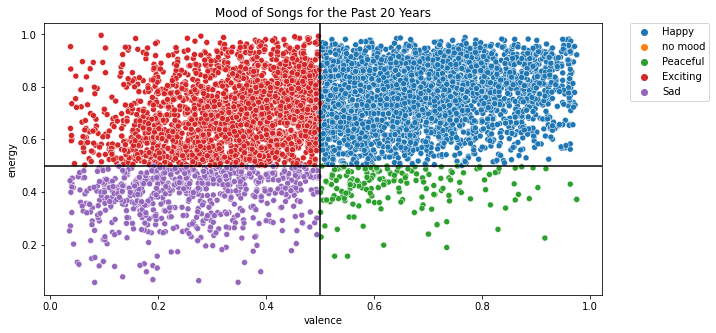

In [204]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='valence', y='energy', hue='mood', data=df[df['year'] >= '2000'])
plt.title('Mood of Songs for the Past 20 Years')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axvline(x=0.5, color='black')
plt.axhline(y=0.5, color='black')


plt.show()

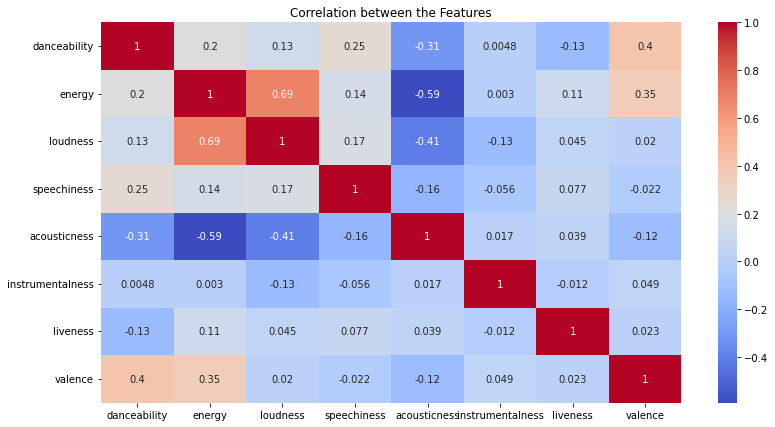

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'spotify_track_duration_ms', 'time_signature']] = scaler.fit_transform(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'spotify_track_duration_ms', 'time_signature']])
df.head()

plt.figure(figsize=(13,7))
sns.heatmap(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the Features')

plt.xticks(rotation=0)
plt.show()


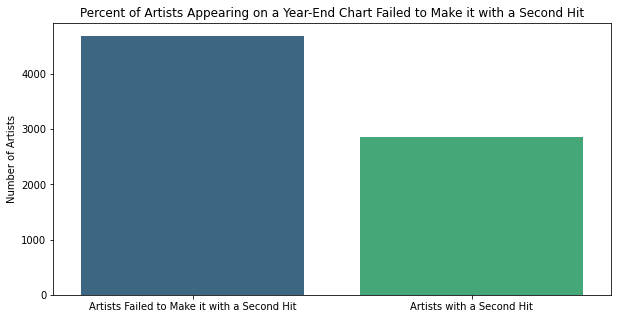

In [206]:
df_successful['Performer'].nunique()

df_successful['Performer'].value_counts()[df_successful['Performer'].value_counts() == 1].count()

df_successful['Performer'].value_counts()[df_successful['Performer'].value_counts() == 1].count() / df_successful['Performer'].nunique() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=['Artists Failed to Make it with a Second Hit', 'Artists with a Second Hit'], y=[df_successful['Performer'].value_counts()[df_successful['Performer'].value_counts() == 1].count(), df_successful['Performer'].value_counts()[df_successful['Performer'].value_counts() > 1].count()], palette='viridis')
plt.title('Percent of Artists Appearing on a Year-End Chart Failed to Make it with a Second Hit')
plt.ylabel('Number of Artists')
plt.show()

In [207]:
df_successful['Performer'].nunique()

7540

In [208]:
print('The percent of artists appearing on a year-end chart failed to make it with a second hit is {:.2f}%'.format(df_successful['Performer'].value_counts()[df_successful['Performer'].value_counts() == 1].count() / df_successful['Performer'].nunique() * 100))
print('The number of artists appearing on a year-end chart failed to make it with a second hit is {}'.format(df_successful['Performer'].value_counts()[df_successful['Performer'].value_counts() == 1].count()))


The percent of artists appearing on a year-end chart failed to make it with a second hit is 62.15%
The number of artists appearing on a year-end chart failed to make it with a second hit is 4686


In [209]:
df_successful['Weeks on Chart'].value_counts()[1]

df_successful['Weeks on Chart'].value_counts()[1] / df_successful['Weeks on Chart'].count() * 100   

print('The percent of songs that were on the chart for 1 week is {:.2f}%'.format(df_successful['Weeks on Chart'].value_counts()[1] / df_successful['Weeks on Chart'].count() * 100))

print('The number of songs that were on the chart for 1 week is {}'.format(df_successful['Weeks on Chart'].value_counts()[1]))

The percent of songs that were on the chart for 1 week is 56.33%
The number of songs that were on the chart for 1 week is 12246


In [210]:
df_successful['Performer'].value_counts() / df_successful['Performer'].count() * 100

print('The percent of number of songs per artist is {}'.format(df_successful['Performer'].value_counts() / df_successful['Performer'].count() * 100))


The percent of number of songs per artist is Drake                            0.340371
Glee Cast                        0.298974
The Beatles                      0.275976
Taylor Swift                     0.248379
Elton John                       0.239179
                                   ...   
David Bowie/Pat Metheny Group    0.004600
Whodini                          0.004600
Lorenzo Lamas                    0.004600
Rick Dees                        0.004600
Blanco Brown                     0.004600
Name: Performer, Length: 7540, dtype: float64


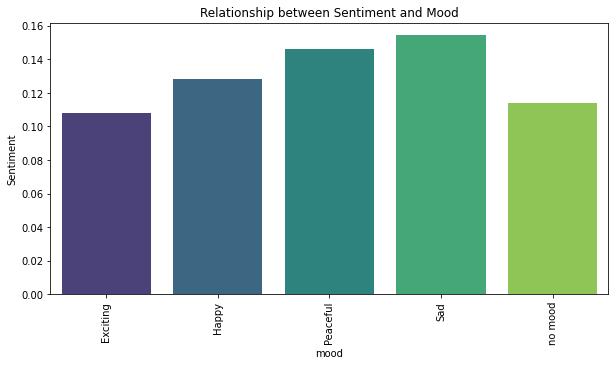

In [214]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('mood')['Sentiment'].mean().index, y=df.groupby('mood')['Sentiment'].mean(), palette='viridis')
plt.title('Relationship between Sentiment and Mood')
plt.xticks(rotation=90)
plt.show()
